## Stock Prediction in Python

# 第一部份 讀取資料（Local, 下載自臺灣證券交易所）

In [1]:
import pandas as pd
import os

stockNo = "2330"
data_dir = "stock_data"


stock_dir = os.path.join(data_dir, stockNo)
files = os.listdir(stock_dir)
df = pd.DataFrame()

def date_transform(date):
    [y, M, d] = date.split("/")
    return "{}-{}-{}".format(str(int(y) + 1911), M, d)

for file in files:
    file_path = os.path.join(stock_dir, file)
    temp_df = pd.read_csv(file_path)
    temp_df['日期'] = temp_df['日期'].apply(date_transform)
    df = pd.concat([df, temp_df])
    
df = df.rename(columns={"日期":"Date", 
                        "成交股數":"Volume" ,
                        "成交金額":"Turnover", 
                        "開盤價":"Open", 
                        "最高價":"High", 
                        "最低價":"Low", 
                        "收盤價":"Close", 
                        "漲跌價差":"Change",
                        "成交筆數":"Transaction"
                        })      

df['Date']= pd.to_datetime(df['Date']) 
df = df.sort_values(by='Date')
df = df.reset_index(drop=True)
df

,Date,Volume,Turnover,Open,High,Low,Close,Change,Transaction
0,2016-01-04,43800291,6137797502,142.5,143.5,139.0,139.5,-3.5,14188
1,2016-01-05,46502108,6436850512,139.0,140.0,137.0,138.0,-1.5,15836
2,2016-01-06,53873344,7321139064,138.0,138.0,135.0,135.5,-2.5,15926
3,2016-01-07,63475065,8432791819,134.5,135.0,130.5,133.0,-2.5,19061
4,2016-01-08,52641383,7022206705,132.0,135.0,132.0,134.0,1.0,11784
...,...,...,...,...,...,...,...,...,...
1450,2021-12-07,21105883,12704452330,602.0,607.0,597.0,607.0,7.0,22160
1451,2021-12-08,22194708,13490034097,614.0,614.0,602.0,602.0,-5.0,15634
1452,2021-12-09,12467833,7554386680,606.0,608.0,602.0,608.0,6.0,9231
1453,2021-12-10,11371659,6874539365,605.0,608.0,602.0,605.0,-3.0,9215


# 第二部份 使用 Stocker 預測股價

In [2]:
from stocker import Stocker
stock = Stocker(stockNo, df)

stockNo : 2330 Stocker Initialized. Data covers 2016-01-04 00:00:00 to 2021-12-13 00:00:00.


## 畫出歷史股價

Maximum Adj. Close = 673.00 on 2021-01-21 00:00:00.
Minimum Adj. Close = 131.50 on 2016-01-14 00:00:00.
Current Adj. Close = 601.00 on 2021-12-13 00:00:00.



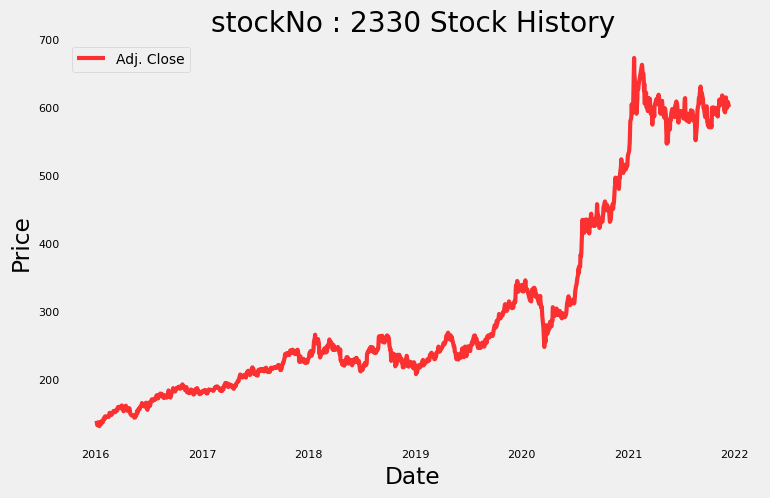

In [3]:
stock.plot_stock()

## 使用 Prophet 模型預測股價

Predicted Price on 2021-12-23 00:00:00 = $622.39


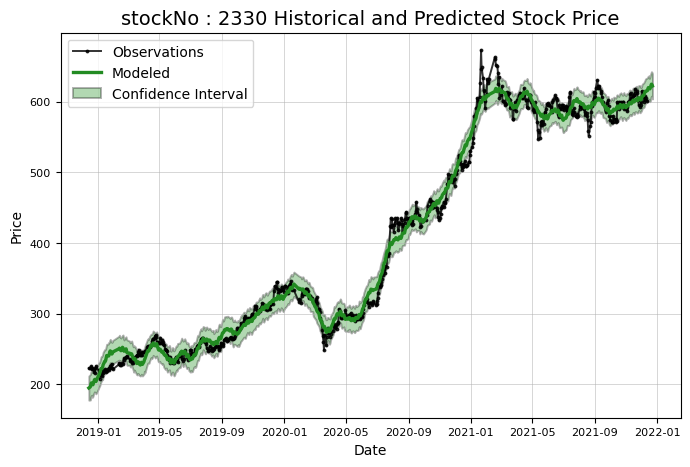

In [4]:
model, model_data = stock.create_prophet_model(days=10)


Prediction Range: 2020-12-13 00:00:00 to 2021-12-13 00:00:00.

Predicted price on 2021-12-11 00:00:00 = $814.15.
Actual price on    2021-12-10 00:00:00 = $605.00.

Average Absolute Error on Training Data = $7.75.
Average Absolute Error on Testing  Data = $90.87.

When the model predicted an increase, the price increased 48.17% of the time.
When the model predicted a  decrease, the price decreased  53.85% of the time.

The actual value was within the 80% confidence interval 47.54% of the time.


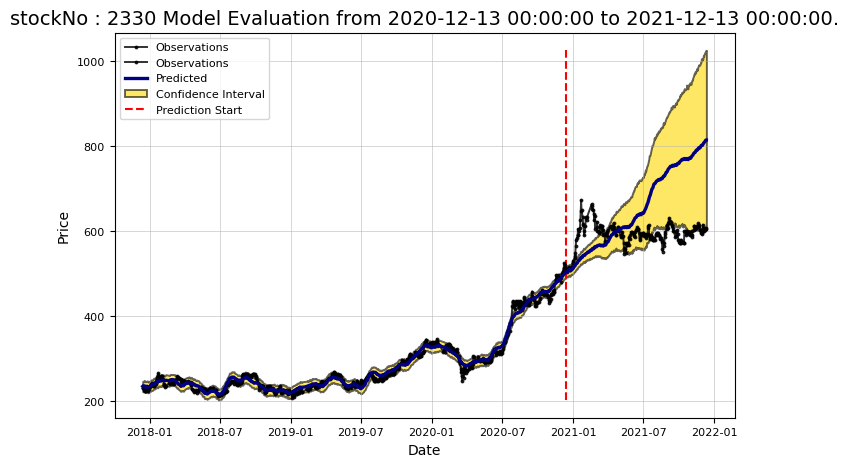

In [5]:
stock.evaluate_prediction()

## 第三部分 評估模型

## changepoint_prior參數選擇

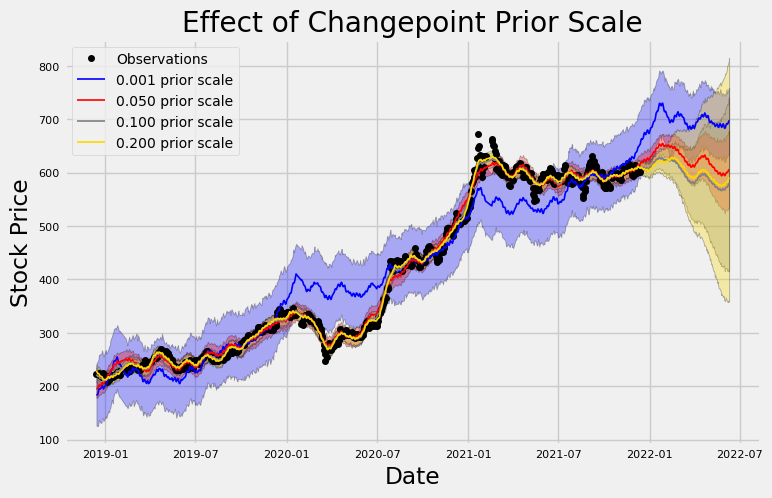

In [6]:
stock.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

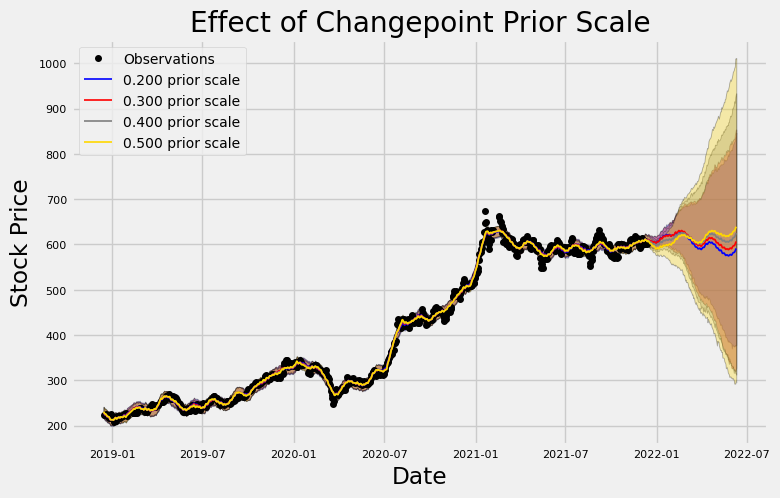

In [7]:
stock.changepoint_prior_analysis(changepoint_priors=[0.2, 0.3, 0.4, 0.5])

## 驗證changepoint_prior_scale訓練之結果


Validation Range 2019-12-13 00:00:00 to 2020-12-11 00:00:00.

     cps  train_err  train_range   test_err  test_range
0  0.001  12.182030    36.122189  84.406083   36.062136
1  0.050   5.151109    16.540471  47.185801  114.135758
2  0.100   4.426912    14.315109  48.119678  174.569691
3  0.200   4.214696    13.688482  48.222283  205.320034


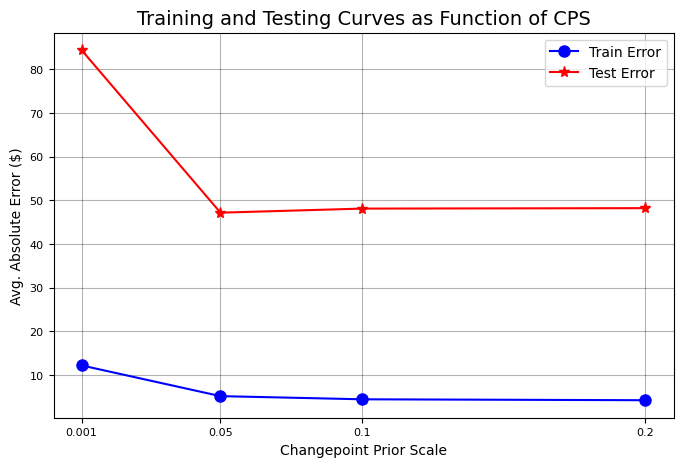

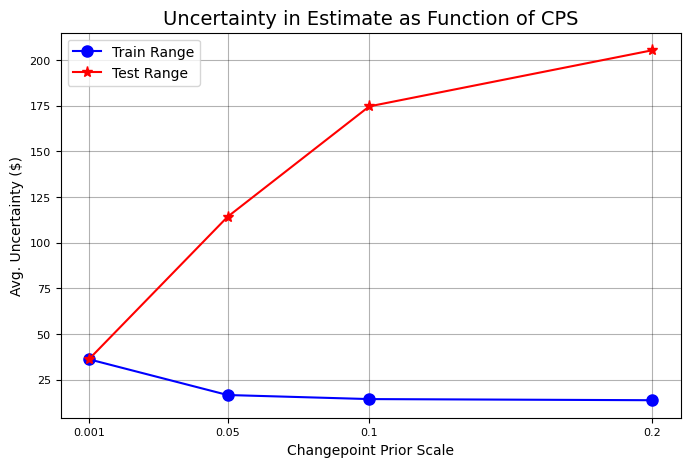

In [8]:
stock.changepoint_prior_validation(start_date='2019-12-13', end_date='2020-12-12', 
                                   changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2019-12-13 00:00:00 to 2020-12-11 00:00:00.

   cps  train_err  train_range   test_err  test_range
0  0.2   4.214696    13.645719  48.222283  217.147973
1  0.3   4.024882    12.970532  49.222478  310.514955
2  0.4   3.907530    12.585577  49.812885  396.447170
3  0.5   3.832927    12.338127  49.675163  451.330649
4  0.6   3.789867    12.237725  49.522126  471.965963
5  0.7   3.762327    12.145322  49.448852  482.023499


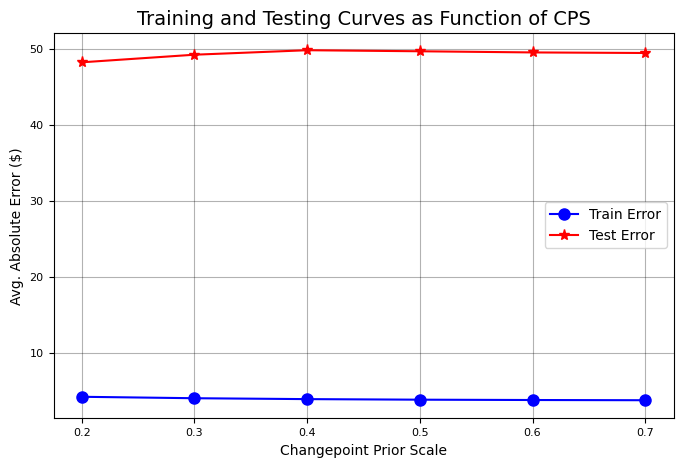

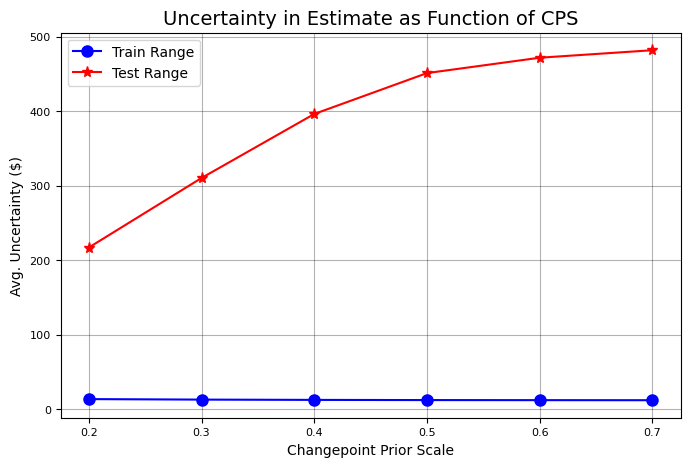

In [9]:
stock.changepoint_prior_validation(start_date='2019-12-13', end_date='2020-12-12', 
                                   changepoint_priors=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7])


Validation Range 2019-12-13 00:00:00 to 2020-12-11 00:00:00.

    cps  train_err  train_range   test_err  test_range
0  0.01   8.253699    25.820701  53.325913   31.014534
1  0.02   7.865408    24.842298  50.842867   33.682487
2  0.03   7.011641    22.130836  47.905493   45.075752
3  0.04   5.689161    18.121582  46.863948   85.995496
4  0.05   5.151109    16.524520  47.185801  114.784959
5  0.06   4.981911    16.029825  47.316847  126.663662
6  0.07   4.678973    15.137815  47.485591  138.942350
7  0.08   4.547827    14.739324  47.753249  155.098692
8  0.09   4.473469    14.500026  47.860781  171.988335
9  0.10   4.426912    14.339743  48.119678  181.250188


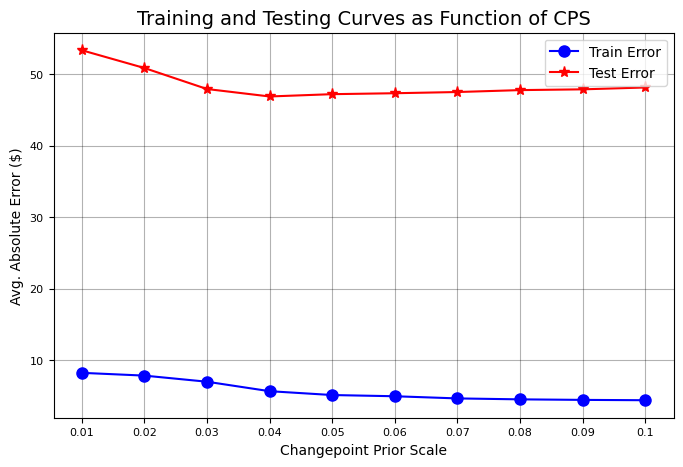

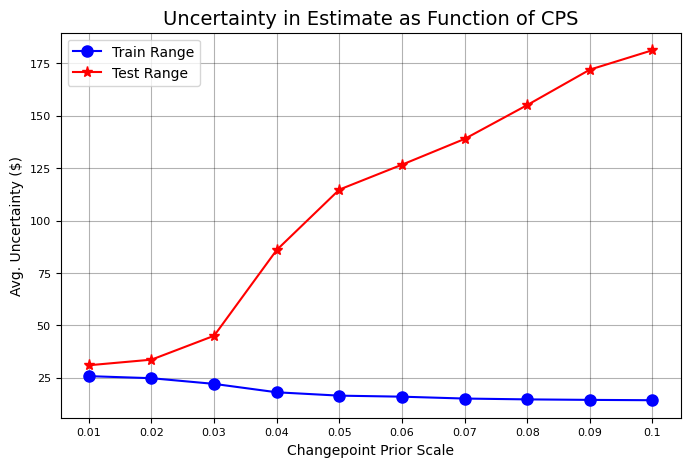

In [10]:
stock.changepoint_prior_validation(start_date='2019-12-13', end_date='2020-12-12', 
                                   changepoint_priors=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])

## 第四部份 使用優化模型再次預測


Prediction Range: 2020-12-13 00:00:00 to 2021-12-13 00:00:00.

Predicted price on 2021-12-11 00:00:00 = $822.05.
Actual price on    2021-12-10 00:00:00 = $605.00.

Average Absolute Error on Training Data = $8.19.
Average Absolute Error on Testing  Data = $94.92.

When the model predicted an increase, the price increased 48.69% of the time.
When the model predicted a  decrease, the price decreased  55.77% of the time.

The actual value was within the 80% confidence interval 34.84% of the time.


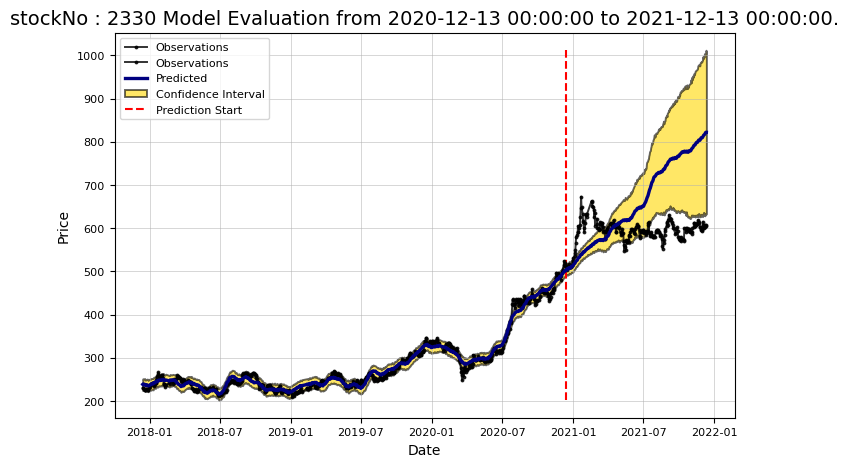

In [11]:
stock.changepoint_prior_scale = 0.04
stock.evaluate_prediction()


Predicted Increase: 

        Date    estimate    change       upper       lower
1 2021-12-14  622.456652  2.986515  639.976803  602.213213
2 2021-12-15  624.440630  1.983977  642.899728  605.430546
6 2021-12-19  625.250630  1.901236  642.194887  606.352662
7 2021-12-20  628.438190  3.187560  646.860416  610.826401
8 2021-12-21  630.610796  2.172605  649.601650  612.028777

Predicted Decrease: 

         Date    estimate    change       upper       lower
3  2021-12-16  624.423100 -0.017530  641.569460  607.050658
4  2021-12-17  623.349394 -1.073706  640.256907  606.811831
9  2021-12-22  630.358397 -0.252398  649.824137  611.994971
10 2021-12-23  628.436291 -1.922106  645.698086  610.108415


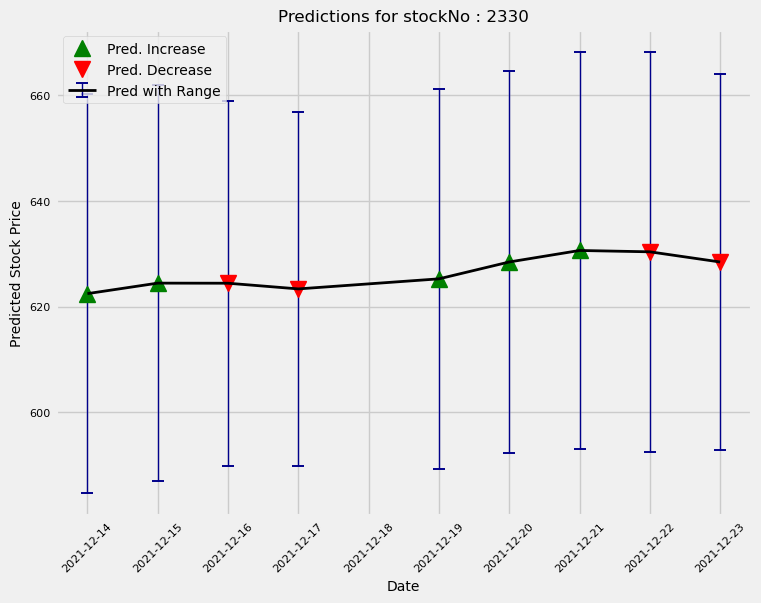

In [12]:
stock.predict_future(days=10) 